In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import symbols, Eq, solve

In [16]:
# Define variables for f1 and f2
d = symbols('d')

# Distances
z1 = 2.0 # m (distance to the first lens)
z2 = 0.50 - d # m (distance from the second lens to the focus point)
f1 = - 100 * 1e-3  # m focal length first defoucs mirror 
f2 = 100 * 1e-3 # m focal length second focus mirror 

# Propagation matrices
M1 = np.array([[1, z1], [0, 1]])   # Propagation to the first lens
M2 = np.array([[1, d], [0, 1]])    # Propagation between the lenses
M3 = np.array([[1, z2], [0, 1]])   # Final propagation

# Thin lens matrices (symbolic for f1 and f2)
L1 = np.array([[1, 0], [-1/f1, 1]])  # Defocusing lens
L2 = np.array([[1, 0], [-1/f2, 1]])  # Focusing lens

# Total matrix = M3 * L2 * M2 * L1 * M1
total_matrix = M3 @ L2 @ M2 @ L1 @ M1

# Extract matrix elements A, B, C, D
A, B, C, D = total_matrix[0, 0], total_matrix[0, 1], total_matrix[1, 0], total_matrix[1, 1]

# Starting parameters
starting_beam_width = 1 * 1e-3  # m
divergence_beam = 0.01 * 1e-3  # radians

startin_parameters = np.array([starting_beam_width, divergence_beam])

equation = Eq(total_matrix.dot(startin_parameters)[0], 0)
solutions = solve(equation, (d))

d_cal = solutions[0]
print(f"d = {d_cal.as_real_imag()[0] * 1e2:.2f} cm")

d = 2.69 cm


In [17]:
d_cal.as_real_imag()[0], z2.subs({d: d_cal.as_real_imag()[0]})

(0.0269004406768395, 0.473099559323161)

In [18]:
# Matrixes for plotting

def get_propagating_air(z_length: float) -> np.array:
    return np.array([[1, z_length], [0, 1]])

def get_lens_matrix(focal_length: float) -> np.array:
    return np.array([[1, 0], [-1/focal_length, 1]])

startin_parameters = np.array([starting_beam_width, divergence_beam])
defocus_lens = get_lens_matrix(focal_length=f1)
focus_lens = get_lens_matrix(focal_length=f2)

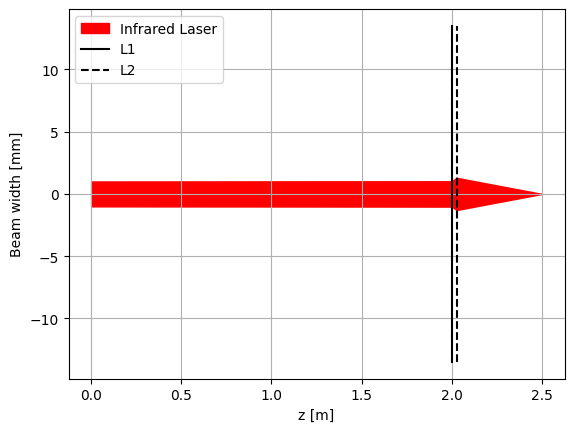

In [20]:
z2 = z2.subs({d: d_cal.as_real_imag()[0]})
d_cal = d_cal.as_real_imag()[0]

vector_defocus = get_propagating_air(z1).dot(startin_parameters)
vector_focus = get_propagating_air(d_cal).dot(defocus_lens.dot(vector_defocus))
vector_entrance = get_propagating_air(z2).dot(focus_lens.dot(vector_focus))

starting_z = 0
starting_y = starting_beam_width

i = 1
for x, y in zip(
    [z1, d_cal, z2],
    [vector_defocus, vector_focus, vector_entrance]
):
    end_z = float(starting_z + x)
    end_y = float(y[0])
    
    xs = np.linspace(starting_z, end_z, 100)
    ys = np.linspace(starting_y, end_y, 100)
        
    plt.fill_between(x=xs, y1=ys * 1e3, y2=-ys * 1e3, color="Red", label="Infrared Laser" if i == 1 else None)
    
    i += 1
    
    starting_z = end_z
    starting_y = end_y

    
lens_radius = 0.0135 * 1e3 # m

plt.plot([z1, z1], [-lens_radius, lens_radius], color="black", label="L1")

plt.plot([z1 + d_cal, z1 + d_cal], [-lens_radius, lens_radius], color="black", linestyle="--", label="L2")

plt.ylabel('Beam width [mm]')
plt.xlabel('z [m]')    
plt.legend()
plt.grid()
plt.show()